# Introduction

This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.


**Data sources:**

`profiles.csv` was provided by Codecademy.com.

## Scoping

Below are four sections to help guide the project process and progress. The first section is the project goals, a section to define the high-level objectives and set the intentions for this project. The next section is the data that needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and aligning the question(s) with the project goals. Lastly, evaluation will help build conclusions and findings from the analysis.

### Project Goals

In this project, the goal is to apply machine learning techniques to a data set. The primary research question that will be answered is whether an OkCupid's user astrological sign can be predicted using other variables from their profiles. This project is important since many users find astrological signs an important part of matches, and if users don't input their sign, OkCupid would like to predict which sign they might be. 


### Data

The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented. 

### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores. 

## Import Python Modules

In [274]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading the data

To analyze the user profiles from OkCupid, pandas will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python.

Here `profiles.csv` is loaded into a `DataFrame` called `profiles`. The `DataFrame` is then briefly examined using `.head()` to check the contents.

In [275]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head(5)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [276]:
profiles.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [277]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [278]:
profiles.last_online.head()

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

#### Data Characteristics

`profiles` has 59,946 rows and 31 columns, this is a good sign since there seems to be enough data for machine learning. 

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…


## Explore the data

First to be explored is the number of unique signs, and the values. It seems that there are 48, but there should only be 12 signs. Upon closer inspection, there seems to be qualifiers attached with the signs. 

In [279]:
print('Number of signs: ', profiles.sign.nunique())
print('Categories: ', profiles.sign.unique())

Number of signs:  48
Categories:  ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpio b

#### Clean labels

It is important that we clean the labels since this is what will be predicted and 48 predictions would be quite difficult. By taking the first word of the column, the signs can be saved without the qualifiers. The qualifiers could be used for another problem down the line.

In [280]:
profiles['signcleaned'] = profiles.sign.str.split().str.get(0)
print('number of signs: ', profiles.signcleaned.nunique())
print(profiles.signcleaned.value_counts())

number of signs:  12
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signcleaned, dtype: int64


## Continous Variables

#### age

The next plot shows the distribution of age in the group. It seems that most users are in their late 20s to early 30s.

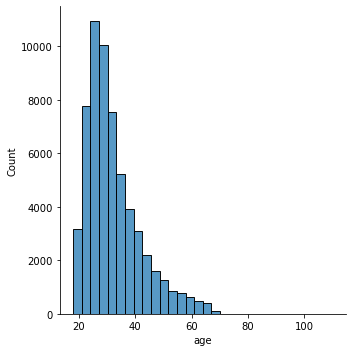

In [281]:
sns.displot(data=profiles, x='age', kind='hist', bins=30)

In [282]:
profiles.age.value_counts(ascending=True)

109       1
110       1
69       31
68       59
67       66
66      105
65      109
64      113
63      138
62      167
61      176
60      195
58      197
59      221
53      252
57      256
55      265
54      267
56      271
18      309
52      344
51      350
50      437
49      459
48      481
47      529
46      578
19      611
45      643
44      708
43      858
20      953
41      980
40     1030
42     1072
39     1172
21     1282
38     1330
37     1427
36     1583
35     1755
34     1902
22     1934
33     2206
32     2587
23     2592
31     2735
30     3149
24     3242
29     3295
25     3531
28     3583
27     3685
26     3724
Name: age, dtype: int64

Here is the same chart but broken down by gender. It seems that there are proportionally similar break down of gender by age but slightly fewer females over all.

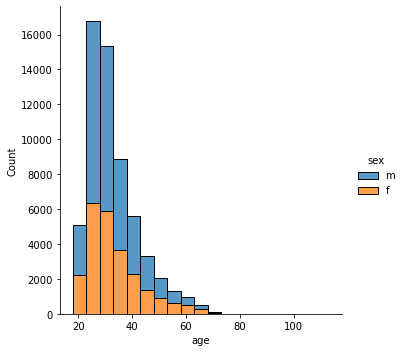

In [283]:
sns.displot(data=profiles, x='age', hue='sex', kind='hist', binwidth=5, multiple='stack')

#### Height

The next plot shows the height variable, most people look like they are between 5 feet tall and 6.5 feet tall.

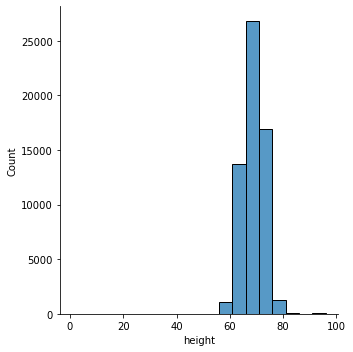

In [284]:
sns.displot(data=profiles, x='height', kind='hist', binwidth=5)

Here is the same chart break down by gender. It seems obvious but females tend to be shorter than males and looks to have a normal distributions.

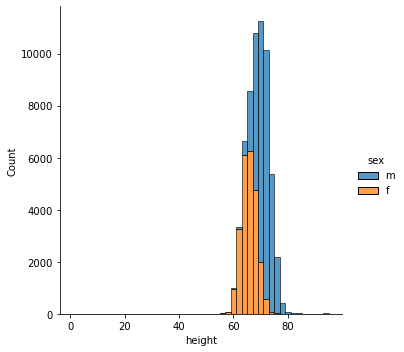

In [285]:
sns.displot(data=profiles, x='height', hue='sex', kind='hist', binwidth=2, multiple='stack')

#### Income
Here is the data for income. It seems like that the majority of participants do not include their income figures.

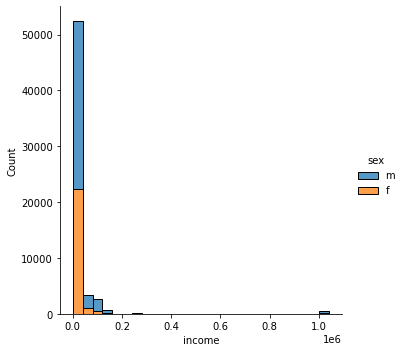

In [286]:
sns.displot(data=profiles, x='income', hue='sex', kind='hist', binwidth= 40000, multiple='stack')

### Descrete variables

#### sex

It was previously identified that there are more male users in the data and it seems that there are 35000 males to 25000 females.

<AxesSubplot:xlabel='sex', ylabel='count'>

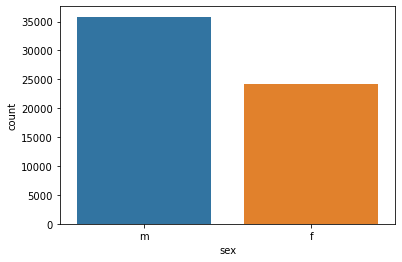

In [287]:
sns.countplot(data=profiles, x='sex' )

#### Body type

The next chart shows body type variable break down by gender and it seems that most users will describe themselves as average, fit or athletic. Also it is shown that some of the body type descriptions are highly gendered. For example "Curvy" and "full figured" are highly female descriptions while males use "a little extra" or "overweight" more often.

<AxesSubplot:xlabel='count', ylabel='body_type'>

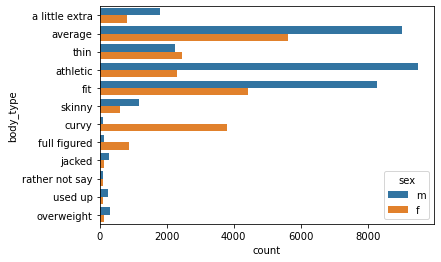

In [288]:
sns.countplot(data=profiles, y='body_type', hue='sex')

#### Diet

Here is a chart for dietary informations of users. Most users eat "mostly anything" following by "anything" and "strictly anything".

<AxesSubplot:xlabel='count', ylabel='diet'>

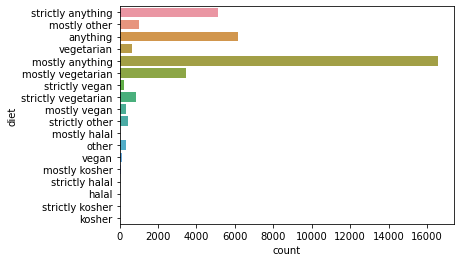

In [289]:
sns.countplot(data=profiles, y='diet')

#### Drinks

The next plot shows that the majority of the users drink "socially" then "rarely" and "often".

<AxesSubplot:xlabel='count', ylabel='drinks'>

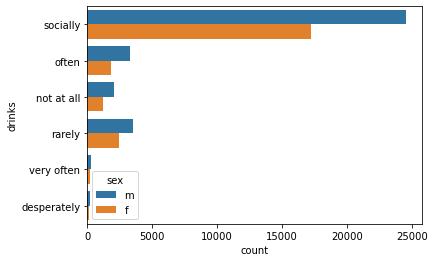

In [290]:
sns.countplot(data=profiles, y='drinks', hue='sex')

#### Drugs

The vast majority of users "never" use drugs. 

<AxesSubplot:xlabel='count', ylabel='drugs'>

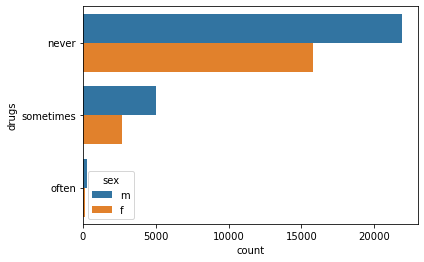

In [291]:
sns.countplot(data=profiles, y='drugs', hue='sex')

#### Graduation

Below you can see the majority of the users are "graduated from college/university" followed by "masters program" and those "working on college/university".
Intrestingly spacce camp related options are fairly a popular option.

<AxesSubplot:xlabel='count', ylabel='education'>

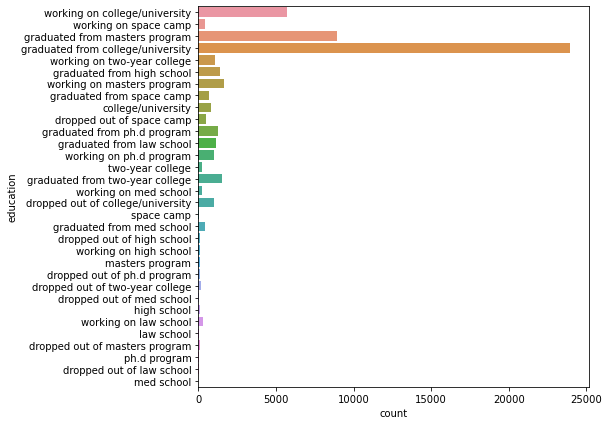

In [292]:
plt.figure(figsize=(7,7))
sns.countplot(data=profiles, y='education')

#### Job

Most users don't fit into the categories provided but there are a fair share of students, artists, tech and business folks.

<AxesSubplot:xlabel='count', ylabel='job'>

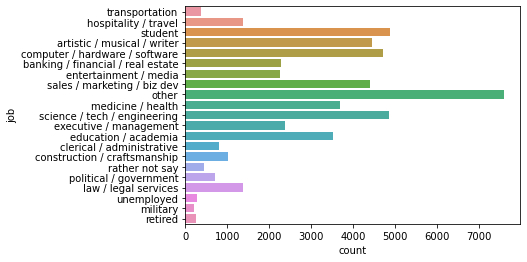

In [293]:
sns.countplot(data=profiles, y='job')

#### Offspring

The data shows that most of the users do not have kids.

<AxesSubplot:xlabel='count', ylabel='offspring'>

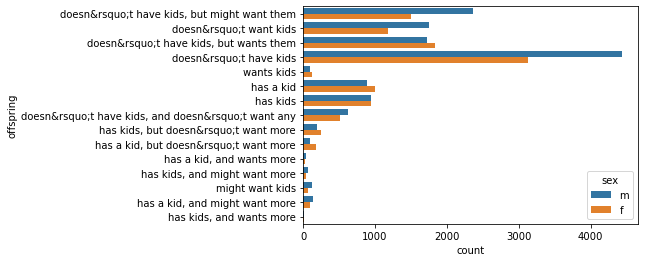

In [294]:
sns.countplot(data=profiles, y='offspring', hue='sex')

#### Orientation

The majority of users are straight.
Intrestingly the majority of users are bisexual. 

<AxesSubplot:xlabel='count', ylabel='orientation'>

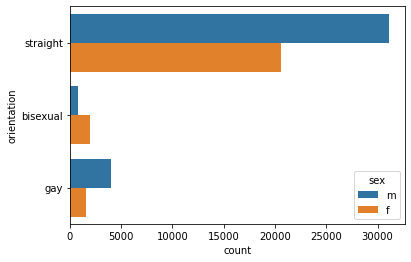

In [295]:
sns.countplot(data=profiles, y='orientation', hue='sex')

#### Pets 
The chart shows that most of the users like or have dogs.

<AxesSubplot:xlabel='count', ylabel='pets'>

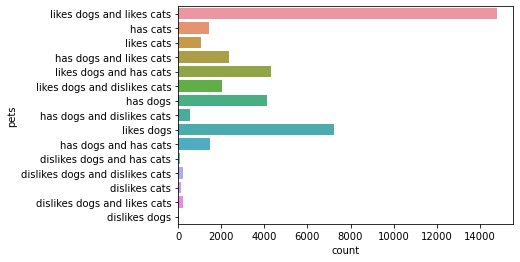

In [296]:
sns.countplot(data=profiles, y='pets')

#### Religion
 Religion is similar to sign where there is a lot of qualifiers. 

<AxesSubplot:xlabel='count', ylabel='religion'>

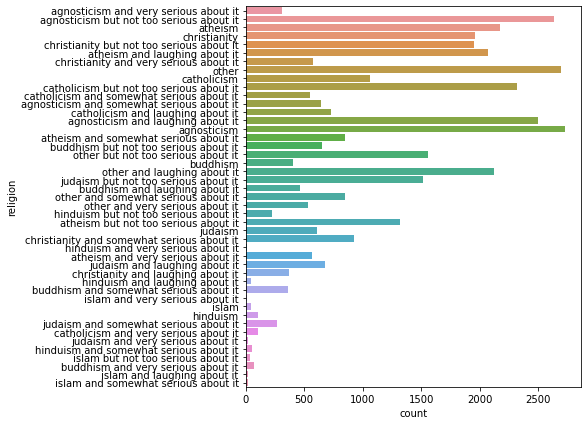

In [297]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y='religion')

Religion is cleaned by taking the first word and distilled down to 9 groups. The majority of users were non-religious identifying as agnosticism, other and atheism.

<AxesSubplot:xlabel='count', ylabel='religion_cleaned'>

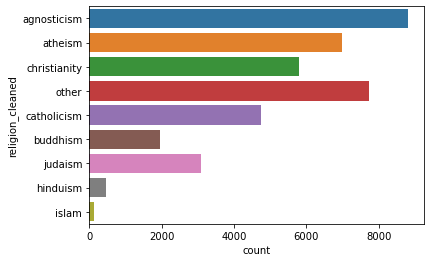

In [298]:
profiles['religion_cleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y='religion_cleaned')

#### Signs

Here are the strological signs of users. They are mainly evenly distributed with 'capricorn' being the rarest and 'leo' being  the most common sign.

<AxesSubplot:xlabel='count', ylabel='signcleaned'>

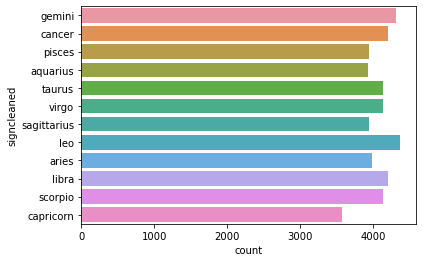

In [299]:
sns.countplot(data=profiles, y='signcleaned')

#### Smoking
Similarly to drugs the majority of users chose no for smoking.

<AxesSubplot:xlabel='count', ylabel='smokes'>

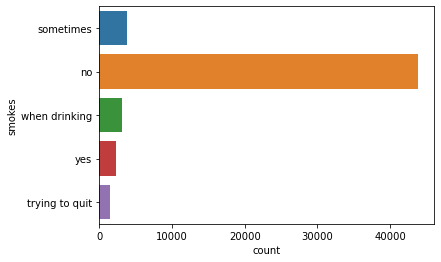

In [300]:
sns.countplot(data=profiles, y='smokes')

#### Status
Status for a dating website is fairly predictable. One would assume that most people are single and available as reflected in the data.

<AxesSubplot:xlabel='count', ylabel='status'>

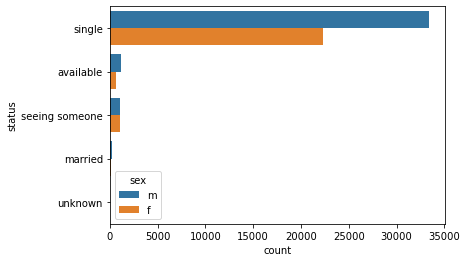

In [301]:
sns.countplot(data=profiles, hue='sex', y='status')

## Data Preperation

#### Missing data
Missing data usually not handled with machine learning algorithms very well and they have to be checked so they may need to be  imputed or removed. It seems that so many of the columns do have missing values.

In [302]:
profiles.isnull().sum()

age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
signcleaned         11056
religion_cleaned    20226
dtype: int64

#### Preprocessing

The data for the model is going to be a subset of the variables. Variables were selected because they might be a good predictor for the astrological signs, where some of the variables that are not selected such as age are not a good indicator.

Here na values has been dropped to create a fully complete data set. 

In [303]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religion_cleaned',
       'sex', 'job', 'signcleaned']
df = profiles[cols].dropna()


#### Dummy Variables

In this next step, dummy variables are created to deal with the categorical variables. Dummy variables will turn the categories per variable into its own binary identifier. The data now has 81 columns to predict signs. 

In [304]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col])
    
df.head()

,signcleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Label Imbalance 

An imbalance in the prediction label needs to be checked. This is important since it's a multi-class problem where two or more outcomes can be had. An imbalance in a response variable is bad since it means that some labels only occur a few times. This is an issue for machine learning algorithms if there are not enough data to train with which will give bad predictions. 

In the given dataset, we observe that the counts of all the zodiac signs are more or less equal (i.e., without large deviations). Hence, we do not have to worry about imbalances and trying to address this problem.

In [305]:
df.signcleaned.value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: signcleaned, dtype: int64

#### Splitting data

Next the data needs to be split into train and validation sets. In this split 25% of the data is reserved for the final validation, while 75% is kept for training the model. 

In [306]:
col_length = len(df.columns)
print(col_length)

81


In [307]:
x = df.iloc[:, 1:81]
y = df.iloc[:, 0:1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

### Prediction 

For this project three common algorithms will be used to make predictions.

Below, the respective modules for Logistic Regression, Decision Trees, and KNN are loaded.

In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


#### Evaluation Metrics

In the models, there will be several values that can be evaluated below is a quick diagram:
![](https://miro.medium.com/max/1400/1*UVP_xb4F6J-M-xH3haz5Jw.png)
here is a quick description of the metrics:

- **Accuracy:** is the correct values divided by total values
- **Recall:** is the True Positives divided by the sum of True Positives and False negatives. So recall is the values of the true positives divided by the actual positive values.
- **Precision:** is the True Positives divided by the sum of True Positives and False positives. So precision is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict. 

#### Logistic Regression

The first model is using logistic regression with the `multi_class="multinomial"` argument. Using `lr_model` predictions are created from the training dataset which is used to figure out how well the model preformed.

The final accuracy of the Logistic regression model is 12% which is terrible, considering a random guess should result in being correct %8 of the times.


In [309]:
lr_model = LogisticRegression(multi_class="multinomial")
lr_model.fit(x_train, y_train)
lr_prediction = lr_model.predict(x_train)

from sklearn.metrics import classification_report
print(classification_report(y_train, lr_prediction))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



#### K Nearest Neighbor

The next models is the `KNeighborsClassifier` which will take 20 of it's neighbors to predict the signs. The default value for `n_neighbors` is 5 which was kept. This number can be tuned later on if needed. This model had a 33% accuracy which is a good sign.


In [310]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_prediction = knn_model.predict(x_train)
print(classification_report(y_train, knn_prediction))

              precision    recall  f1-score   support

    aquarius       0.26      0.65      0.37       968
       aries       0.27      0.50      0.35       983
      cancer       0.27      0.41      0.33      1129
   capricorn       0.34      0.32      0.33       882
      gemini       0.37      0.34      0.35      1130
         leo       0.38      0.29      0.33      1121
       libra       0.39      0.26      0.31      1028
      pisces       0.40      0.25      0.31       997
 sagittarius       0.42      0.22      0.29       965
     scorpio       0.41      0.23      0.30      1001
      taurus       0.42      0.25      0.31      1045
       virgo       0.42      0.24      0.31      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



#### Decision Trees

The last model is the decision tree, the default `max_depth` is `none` which means that it will "If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.". The results are very promising because it has a 78% accuracy with this model.

In [311]:
cart_model = DecisionTreeClassifier().fit(x_train, y_train)
cart_prediction = cart_model.predict(x_train)
print(classification_report(y_train, cart_prediction))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis. Since the diagonals are lighter in color and have higher numbers, the accuracy is going to be high since those are the True Positives.

In [312]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, cart_prediction))
print(cart_model.classes_)

[[911   8   7   3   2  10   8   7   4   5   1   2]
 [ 51 864  12   4   5   8  10   9   2   8   6   4]
 [ 51  47 970   6   6  13   9   9   2   5   5   6]
 [ 33  34  34 744   4   5   8   9   3   2   1   5]
 [ 45  52  53  42 893   7   9  15   2   7   2   3]
 [ 37  38  43  32  37 898   6  10   2   5   4   9]
 [ 40  48  47  23  29  31 785   8   2   3   5   7]
 [ 44  32  45  28  36  23  36 736   2   7   4   4]
 [ 41  48  40  26  32  35  29  21 678   6   6   3]
 [ 34  53  39  30  29  35  25  25  15 710   3   3]
 [ 31  41  39  39  30  31  36  28  16  21 731   2]
 [ 48  44  46  31  37  31  34  25  20  23  19 732]]
['aquarius' 'aries' 'cancer' 'capricorn' 'gemini' 'leo' 'libra' 'pisces'
 'sagittarius' 'scorpio' 'taurus' 'virgo']


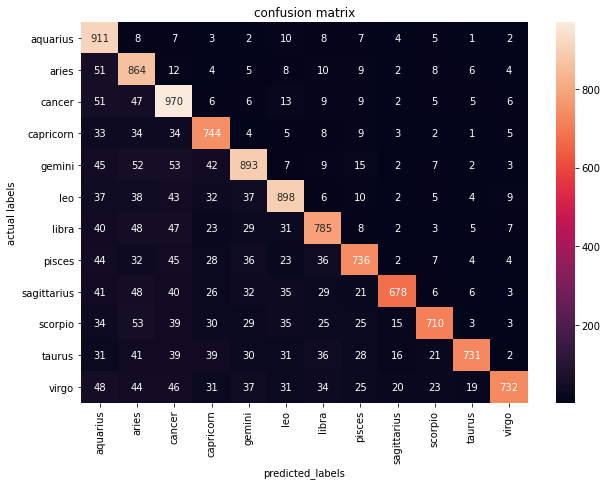

In [313]:
cart_cm = confusion_matrix(y_train, cart_prediction)
cart_labels = cart_model.classes_

plt.figure(figsize=(10,7))
ax=plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax, fmt='d')
ax.set_xlabel('predicted_labels')
ax.set_ylabel('actual labels')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(cart_labels)
ax.yaxis.set_ticklabels(cart_labels)
ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(rotation=360)


plt.show()


Going back to the model, a quick analysis will show that this tree model has a depth of 49 branches, which will probably not generalize to another dataset. In this case this model has been "overfit" for this data.

In [322]:
cart_model.get_depth()

49

#### Kfold

To make a point, a five fold cross validation is created with the same data. The results are worse than the KNN and about the Logistic Regression algorithms. the baseline was ~9%

In [314]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, x_train, y_train, cv=kfold, scoring='accuracy')

print(results)
print('Baseline: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))

[0.0834684  0.0952188  0.09035656 0.09643436 0.09160924]
Baseline: 9.14% (0.46%)


The decision tree model will be made it again, but with a `max_depth` of 20 to stop the algorithm from reaching the stopping point. The new accuracy rate of ~41% is worse than the first iteration, but slightly better than the KNN model. 

In [315]:
cart_model20 = DecisionTreeClassifier(max_depth=20).fit(x_train, y_train)
cart_prediction20 = cart_model20.predict(x_train)

In [316]:
print(classification_report(y_train, cart_prediction20))

              precision    recall  f1-score   support

    aquarius       0.57      0.39      0.46       968
       aries       0.43      0.43      0.43       983
      cancer       0.37      0.50      0.42      1129
   capricorn       0.52      0.42      0.47       882
      gemini       0.41      0.44      0.42      1130
         leo       0.36      0.49      0.41      1121
       libra       0.29      0.42      0.34      1028
      pisces       0.66      0.34      0.45       997
 sagittarius       0.65      0.33      0.44       965
     scorpio       0.36      0.40      0.38      1001
      taurus       0.53      0.39      0.45      1045
       virgo       0.32      0.40      0.36      1090

    accuracy                           0.41     12339
   macro avg       0.46      0.41      0.42     12339
weighted avg       0.45      0.41      0.42     12339



If we check again with cross validation, the new model is still averaging ~8% which is not very good. 

In [317]:
result20 = cross_val_score(cart_model20, x_train, y_train, cv=kfold, scoring='accuracy')
print(result20)
print('Baseline: %.2f%% (%.2f%%)' % (result20.mean()*100, result20.std()*100))

[0.07779579 0.0834684  0.08752026 0.08427877 0.09079854]
Baseline: 8.48% (0.43%)


### Final model

So it seems that the `knn_model` might be the best model for OkCupid to use when users don't have their signs listed on their user profile. By using the hold out or validation set, we get ~8% accuracy which is not very good. 

In [318]:
knn_predictionTest = knn_model.predict(x_test)
print(classification_report(y_test, knn_predictionTest))
knn_labels = knn_model.classes_

              precision    recall  f1-score   support

    aquarius       0.07      0.22      0.11       294
       aries       0.09      0.15      0.11       345
      cancer       0.08      0.13      0.10       328
   capricorn       0.09      0.08      0.09       315
      gemini       0.08      0.08      0.08       366
         leo       0.08      0.06      0.07       395
       libra       0.10      0.07      0.08       326
      pisces       0.09      0.06      0.07       337
 sagittarius       0.09      0.04      0.05       347
     scorpio       0.10      0.05      0.07       355
      taurus       0.11      0.07      0.08       345
       virgo       0.10      0.06      0.07       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



In the confusion matrix, it becomes clear that Cancer, Gemini, Leo, and Virgo were predicted most often, but was not super accurate since the vertical color band represents even distributed guesses mostly wrong and some correct. 

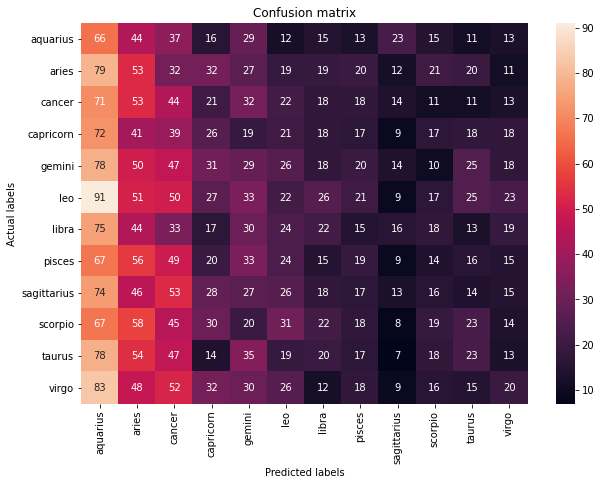

In [319]:
cm_final = confusion_matrix(y_test, knn_predictionTest)

plt.figure(figsize=(10,7))
ax = plt.subplot()

sns.heatmap(cm_final, annot=True, ax=ax, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion matrix')
ax.set_xticklabels(knn_labels, rotation=90)
ax.set_yticklabels(knn_labels, rotation=360)

plt.show()

### Conclusion

#### General Comments

In this project machine learning was used to predict the astrological signs of OkCupid users. This is an important feature since many people believe in astrology and matches between compatible star signs. If users don't input their signs, an algorithmic solution could have generated a sign to impute missing data when making matches.

Alas, the final selected algorithm did no better than basic guessing.

#### Next Steps 

Next steps will be to seriously consider whether it is possible to predict user's astrological signs period, or if there is a way to do with more data. Another possibility is to add additional models or tune the hyper parameters of the used models to see if any more predictive power could be squeezed out of the algorithms. 